<h4>Agriculture: Crop Yield Prediction</h4>
<p>• Farmers use data science to analyze historical weather data, soil conditions, and crop
information to predict and optimize crop yields. This assists in resource allocation and
planning.</p>

In [35]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("rice_final.csv")

In [61]:
print(df.columns.to_list())
df


['Unnamed: 0.1', 'Unnamed: 0', 'Average_Temperature', 'Precipitation', 'Humidity', 'Wind_Speed', 'Soil_Type', 'Soil_pH', 'Soil_Nitrogen', 'Soil_Potassium', 'Soil_Calcium', 'Soil_Moisture', 'Variety', 'Fertilizer_Type', 'Fertilizer_Quantity', 'Irrigation_Type', 'Irrigation_Frequency', 'Location', 'Yield', 'Quantity', 'Cost_of_Production', 'Market_Price']


,Unnamed: 0.1,Unnamed: 0,Average_Temperature,Precipitation,Humidity,Wind_Speed,Soil_Type,Soil_pH,Soil_Nitrogen,Soil_Potassium,...,Variety,Fertilizer_Type,Fertilizer_Quantity,Irrigation_Type,Irrigation_Frequency,Location,Yield,Quantity,Cost_of_Production,Market_Price
0,0,0,NaN,189.632343,65.553988,15.381636,NaN,6.498371,32.763314,25.650081,...,brown,Organic,59.438421,Flood,5.0,South India,1927.474510,Grade A,2992.171725,54.114200
1,1,1,34.507143,157.219273,76.257028,14.583638,Loam,7.319254,38.482606,17.307893,...,Basmati,Organic,46.570619,Flood,3.0,North India,1883.481123,Grade A,3322.854927,55.834221
2,2,2,32.319939,111.905523,76.177204,5.512841,Loam,6.838401,30.198100,25.250519,...,brown,Organic,116.320710,Flood,3.0,South India,1652.228214,Grade B,2614.083697,69.991229
3,3,3,30.986585,212.759004,81.966747,11.824957,Loam,7.158574,31.903844,17.344078,...,Sona Masoori,Chemical,69.060774,Flood,5.0,South India,2166.708855,Grade C,2434.821019,65.299089
4,4,4,26.560186,186.946235,76.177204,12.603912,Silt,7.257958,43.349717,21.744132,...,brown,Chemical,75.908397,Flood,2.0,South India,1784.288289,Grade C,3779.261594,50.853100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,496,30.663501,52.005013,63.885045,23.940430,Loam,7.471177,42.393851,16.236144,...,Jasmine,Chemical,89.498747,Flood,2.0,North India,2389.974937,Grade C,3385.964912,66.748583
497,497,497,26.954068,51.503759,71.675402,22.757946,Silt,5.753810,33.955415,16.749878,...,Jasmine,Chemical,89.624060,Sprinkler,2.0,West India,2392.481203,Grade A,3389.473684,62.762796
498,498,498,29.379897,51.002506,82.180435,13.163122,Clay,6.967334,43.976799,28.187294,...,Sona Masoori,Organic,89.749373,Sprinkler,6.0,North India,2394.987469,Grade A,3392.982456,46.142261
499,499,499,34.062922,50.501253,83.136307,21.707231,Silt,5.619329,30.749520,22.129660,...,ponni,Organic,89.874687,Drip,6.0,West India,2397.493734,Grade C,3396.491228,40.025305


<AxesSubplot:>

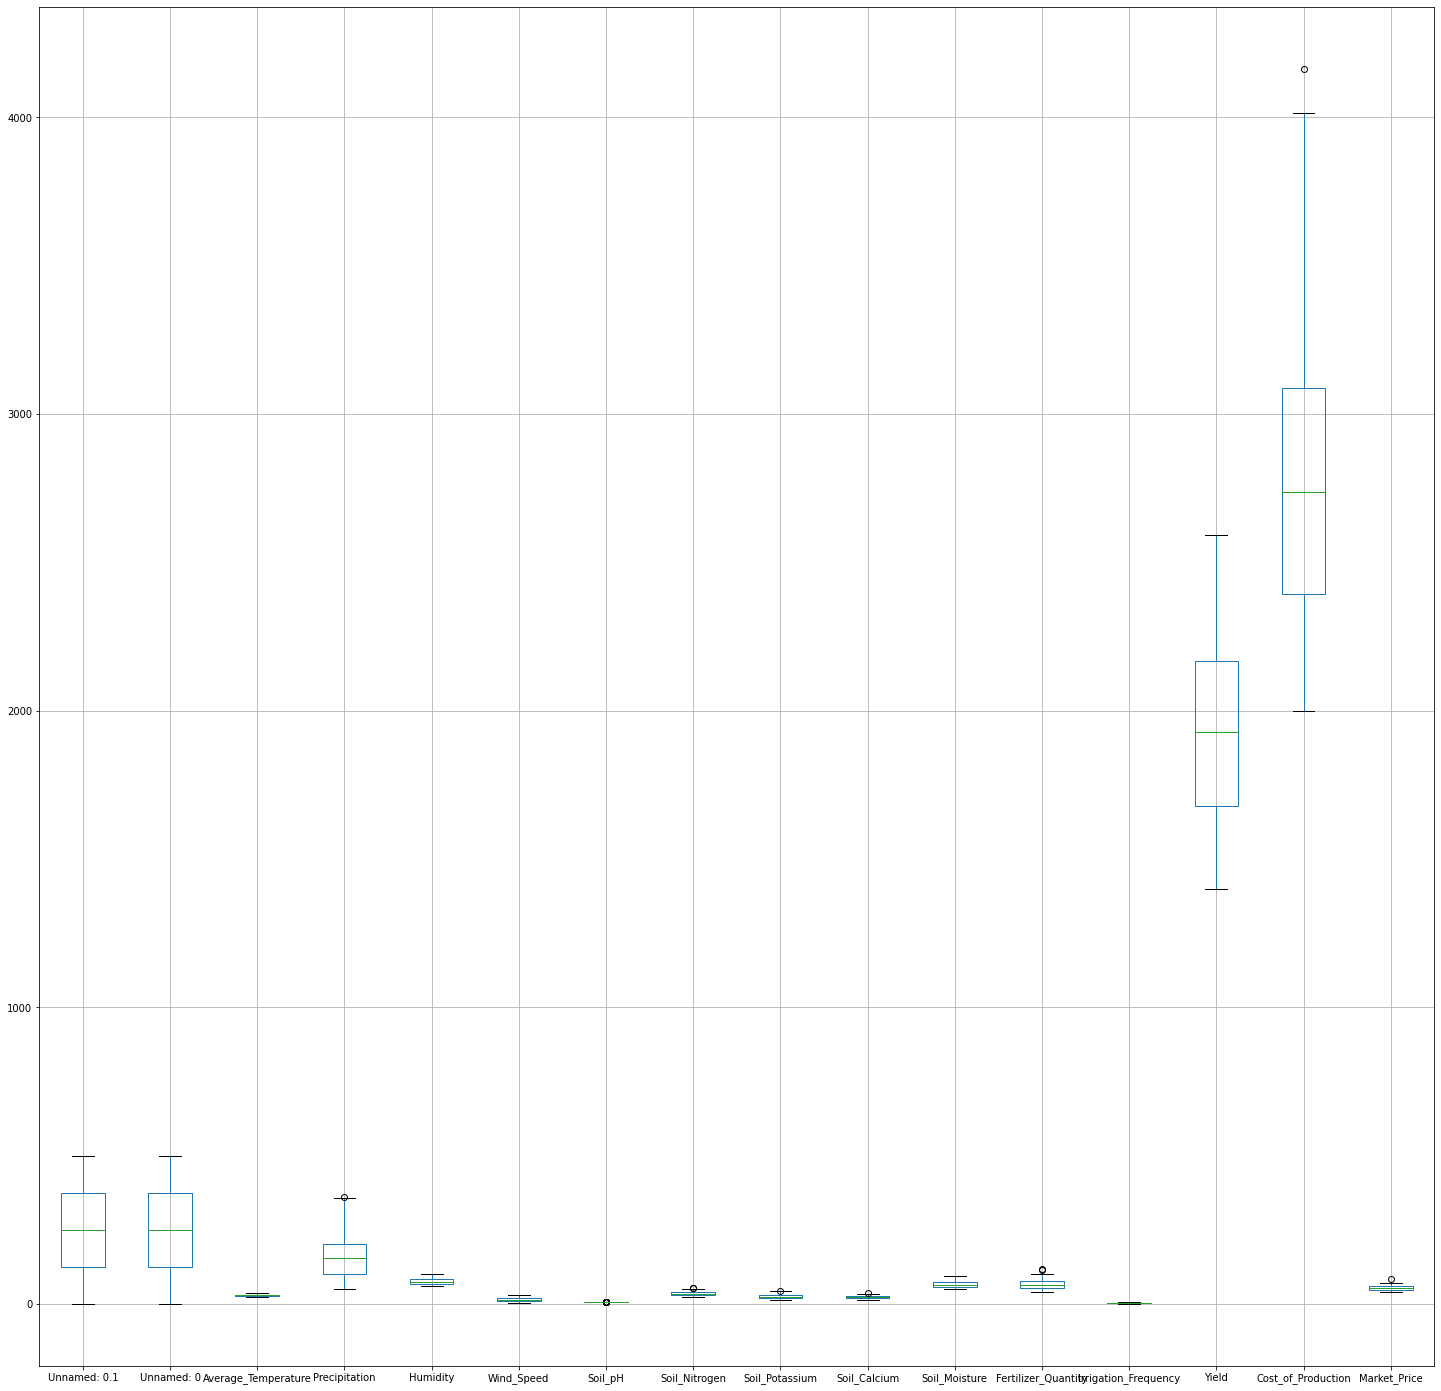

In [62]:
df.boxplot(figsize=(25,25))

<h3> Data Preprocessing</h3>

In [63]:
df.info()
string_columns=[]
for column in df.columns.to_list():
    # Choose appropriate plot type based on data type
    if df[column].dtype == 'O':
        string_columns.append(column)
df[string_columns]=df[string_columns].fillna(df[string_columns].mode().iloc[0])
df
print(df.columns.to_list())
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          501 non-null    int64  
 1   Unnamed: 0            501 non-null    int64  
 2   Average_Temperature   500 non-null    float64
 3   Precipitation         501 non-null    float64
 4   Humidity              501 non-null    float64
 5   Wind_Speed            501 non-null    float64
 6   Soil_Type             499 non-null    object 
 7   Soil_pH               501 non-null    float64
 8   Soil_Nitrogen         501 non-null    float64
 9   Soil_Potassium        501 non-null    float64
 10  Soil_Calcium          501 non-null    float64
 11  Soil_Moisture         501 non-null    float64
 12  Variety               501 non-null    object 
 13  Fertilizer_Type       501 non-null    object 
 14  Fertilizer_Quantity   501 non-null    float64
 15  Irrigation_Type       5

In [64]:
df.info()
for column in df.columns.to_list():
    if pd.api.types.is_numeric_dtype(df[column]):   
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]

df.fillna(df.mean(numeric_only=True), inplace=True)
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          501 non-null    int64  
 1   Unnamed: 0            501 non-null    int64  
 2   Average_Temperature   500 non-null    float64
 3   Precipitation         501 non-null    float64
 4   Humidity              501 non-null    float64
 5   Wind_Speed            501 non-null    float64
 6   Soil_Type             501 non-null    object 
 7   Soil_pH               501 non-null    float64
 8   Soil_Nitrogen         501 non-null    float64
 9   Soil_Potassium        501 non-null    float64
 10  Soil_Calcium          501 non-null    float64
 11  Soil_Moisture         501 non-null    float64
 12  Variety               501 non-null    object 
 13  Fertilizer_Type       501 non-null    object 
 14  Fertilizer_Quantity   501 non-null    float64
 15  Irrigation_Type       5

,Unnamed: 0.1,Unnamed: 0,Average_Temperature,Precipitation,Humidity,Wind_Speed,Soil_Type,Soil_pH,Soil_Nitrogen,Soil_Potassium,...,Variety,Fertilizer_Type,Fertilizer_Quantity,Irrigation_Type,Irrigation_Frequency,Location,Yield,Quantity,Cost_of_Production,Market_Price
0,0,0,30.073755,189.632343,65.553988,15.381636,Clay,6.498371,32.763314,25.650081,...,brown,Organic,59.438421,Flood,5.0,South India,1927.474510,Grade A,2992.171725,54.114200
1,1,1,34.507143,157.219273,76.257028,14.583638,Loam,7.319254,38.482606,17.307893,...,Basmati,Organic,46.570619,Flood,3.0,North India,1883.481123,Grade A,3322.854927,55.834221
2,2,2,32.319939,111.905523,76.177204,5.512841,Loam,6.838401,30.198100,25.250519,...,brown,Organic,65.413906,Flood,3.0,South India,1652.228214,Grade B,2614.083697,69.991229
3,3,3,30.986585,212.759004,81.966747,11.824957,Loam,7.158574,31.903844,17.344078,...,Sona Masoori,Chemical,69.060774,Flood,5.0,South India,2166.708855,Grade C,2434.821019,65.299089
4,4,4,26.560186,186.946235,76.177204,12.603912,Silt,7.257958,43.349717,21.744132,...,brown,Chemical,75.908397,Flood,2.0,South India,1784.288289,Grade C,3779.261594,50.853100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,496,30.663501,52.005013,63.885045,23.940430,Loam,7.471177,42.393851,16.236144,...,Jasmine,Chemical,89.498747,Flood,2.0,North India,2389.974937,Grade C,3385.964912,66.748583
497,497,497,26.954068,51.503759,71.675402,22.757946,Silt,5.753810,33.955415,16.749878,...,Jasmine,Chemical,89.624060,Sprinkler,2.0,West India,2392.481203,Grade A,3389.473684,62.762796
498,498,498,29.379897,51.002506,82.180435,13.163122,Clay,6.967334,43.976799,28.187294,...,Sona Masoori,Organic,89.749373,Sprinkler,6.0,North India,2394.987469,Grade A,3392.982456,46.142261
499,499,499,34.062922,50.501253,83.136307,21.707231,Silt,5.619329,30.749520,22.129660,...,ponni,Organic,89.874687,Drip,6.0,West India,2397.493734,Grade C,3396.491228,40.025305


<AxesSubplot:>

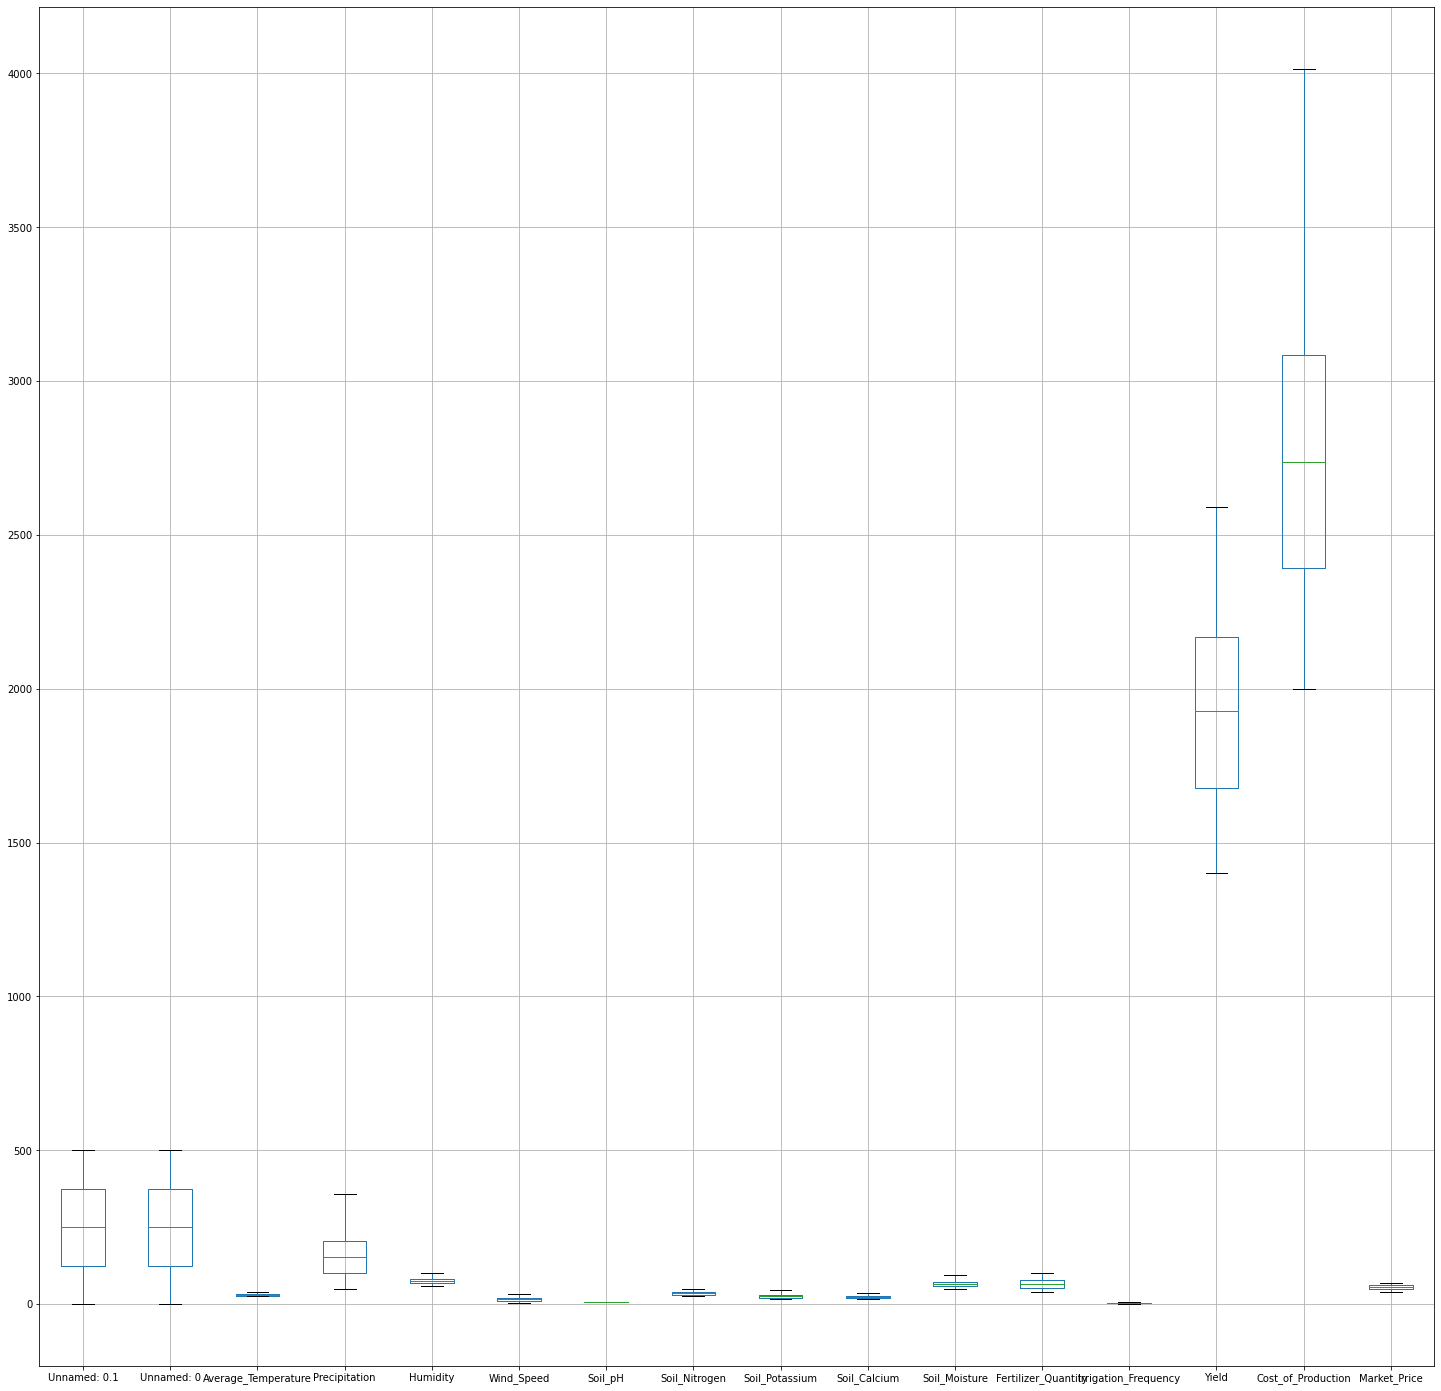

In [65]:
df.boxplot(figsize=(25,25))

In [11]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Average_Temperature,Precipitation,Humidity,Wind_Speed,Soil_pH,Soil_Nitrogen,Soil_Potassium,Soil_Calcium,Soil_Moisture,Fertilizer_Quantity,Irrigation_Frequency,Yield,Cost_of_Production,Market_Price
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,250.000000,250.000000,30.071103,153.746105,76.177204,15.010680,6.450350,35.180684,25.210571,22.967452,65.288144,65.413906,4.058909,1927.474510,2734.881364,54.921585
std,144.770508,144.770508,2.972215,60.242181,9.099735,5.760328,0.545326,5.776443,5.824932,4.345468,8.892980,14.585464,1.423882,295.347678,417.266796,8.626039
min,0.000000,0.000000,25.035992,50.000000,60.019171,5.081233,5.500722,25.045154,15.026466,15.056519,50.107520,40.000000,2.000000,1400.000000,2000.000000,40.025305
25%,125.000000,125.000000,27.460287,101.648878,68.920470,9.896185,5.995288,30.428826,20.326302,19.499131,57.561506,53.035439,3.000000,1678.195489,2392.982456,47.530104
50%,250.000000,250.000000,30.071103,154.161166,76.177204,15.238272,6.450350,35.213935,25.250519,22.997176,65.288144,65.621089,4.000000,1927.474510,2737.734018,54.981446
75%,375.000000,375.000000,32.202004,203.797483,83.205751,19.323013,6.862874,40.146204,30.192036,26.702577,73.022428,77.969925,5.000000,2166.708855,3084.210526,62.167151
max,500.000000,500.000000,37.964417,356.785537,100.562211,31.941488,7.491702,50.452168,44.766937,35.607103,95.212413,100.149542,7.923060,2592.124197,4015.258962,69.991229


<h2> Frequency Distribution</h2>

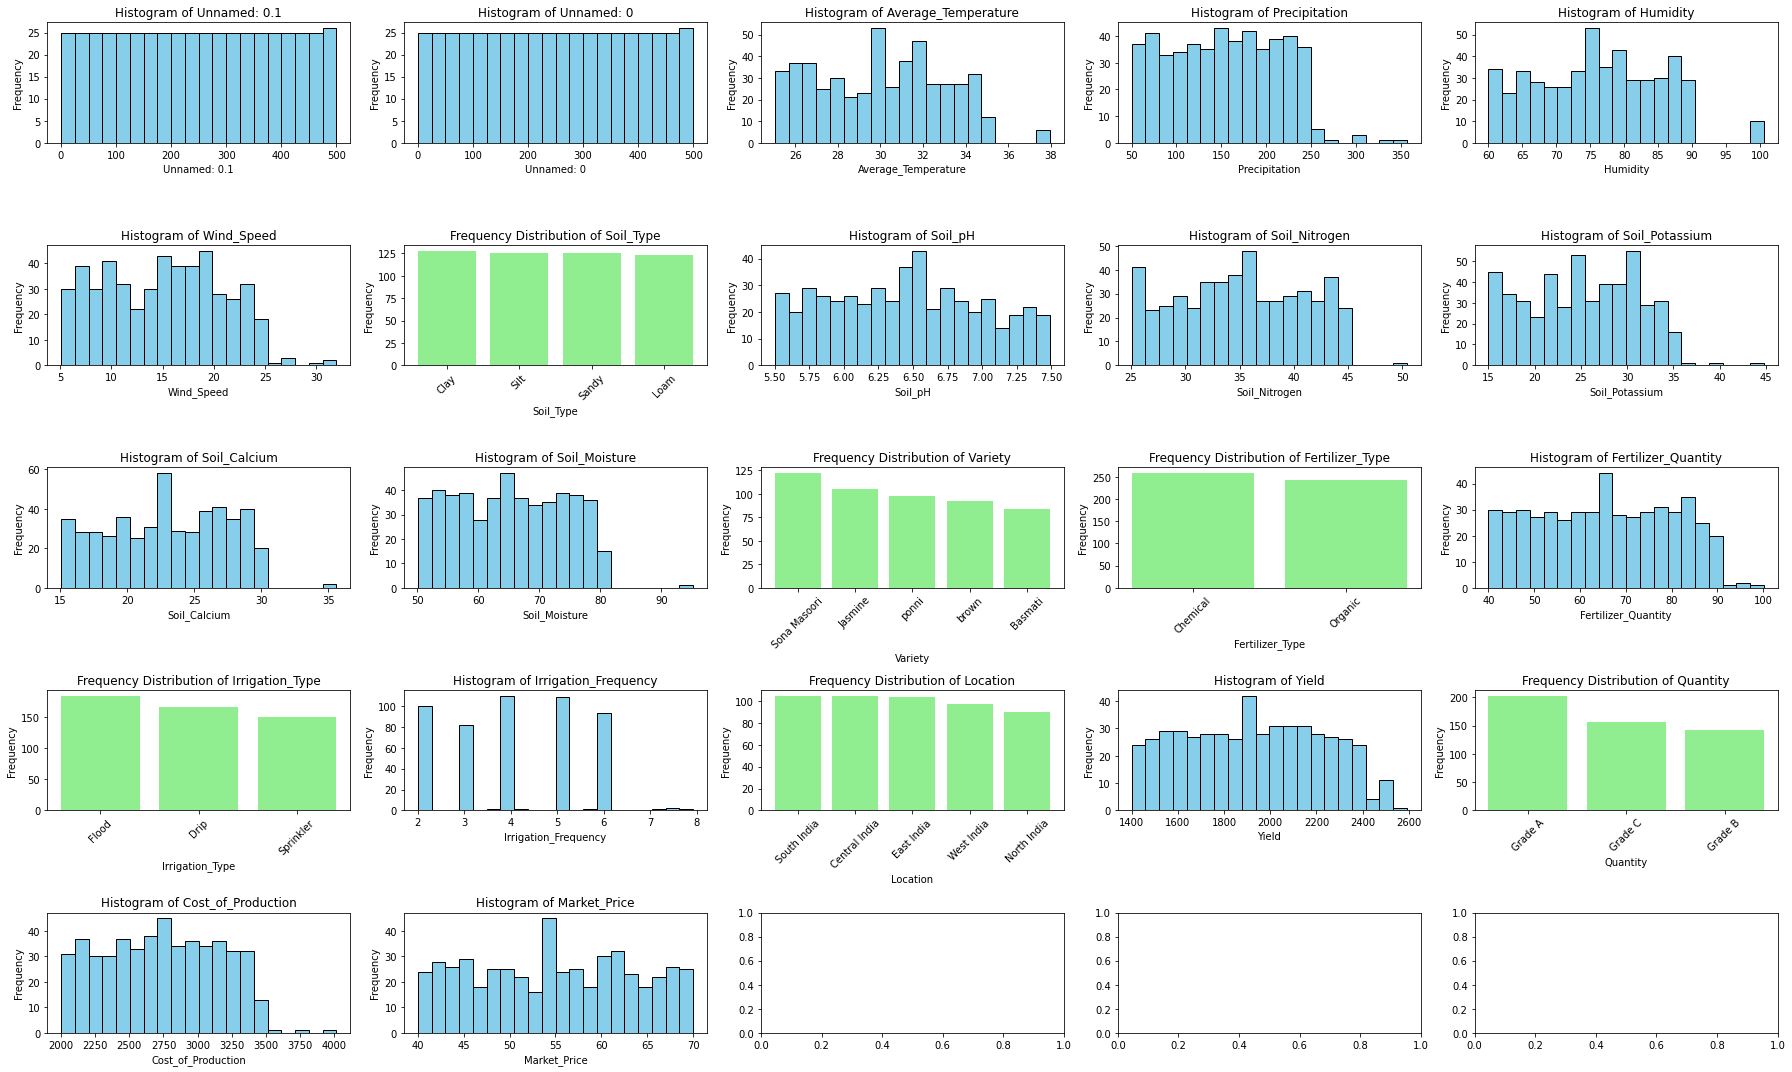

In [71]:

fig, axes = plt.subplots(5, 5, figsize=(25, 15))

axes = axes.flatten()



# Loop through each column and create frequency distribution
for i, column in enumerate(df.columns.to_list()):
    # Choose appropriate plot type based on data type
    if df[column].dtype == 'O':  # 'O' represents object (categorical) type
        value_counts = df[column].value_counts()
        axes[i].bar(value_counts.index, value_counts.values, color='lightgreen')
        axes[i].set_title(f'Frequency Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        axes[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


<h2>Aggregate Functions</h2>

In [13]:
piv_table=pd.pivot_table(df,index=['Average_Temperature','Humidity'],aggfunc={'Average_Temperature':np.mean})
piv_table


C:\Users\Arun\AppData\Local\Temp\ipykernel_36112\207917182.py:1: FutureWarning: The provided callable <function mean at 0x000001E4DA18F7E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  piv_table=pd.pivot_table(df,index=['Average_Temperature','Humidity'],aggfunc={'Average_Temperature':np.mean})


Average_Temperature
Average_Temperature Humidity                      
25.035992           87.194552            25.035992
25.054098           74.397444            25.054098
25.055221           61.262796            25.055221
25.069008           66.151041            25.069008
25.073616           63.357645            25.073616
...                                            ...
37.964417           66.547617            37.964417
                    70.638665            37.964417
                    76.177204            37.964417
                    85.475870            37.964417
                    87.731886            37.964417

[496 rows x 1 columns]

<h2>Mean,Median,Mode </h2>

In [55]:
import statistics

# column=['Average_Temperature', 'Precipitation', 'Humidity', 'Wind_Speed','Soil_Type',
#                      'Soil_pH', 'Soil_Nitrogen', 'Soil_Potassium', 'Soil_Calcium', 'Soil_Moisture',
#                      'Fertilizer_Quantity', 'Irrigation_Frequency', 'Yield', 'Cost_of_Production', 'Market_Price']
# result=[]

# for col in column:
#     mean=df[col].mean()
#     median=df[col].median()
value_counts=df['Soil_Type'].value_counts()
print(value_counts)
value_counts.values
df['Soil_Type'].mode().iloc[0]
#     std_dev=df[col].std()
#     result.append({'Column': col,
#         'Mean': mean,
#         'Median': median,
#         'Mode': mode,
#         'Standard_Deviation': std_dev})

# summary=pd.DataFrame(result)
# summary

Soil_Type
Clay     128
Silt     125
Sandy    125
Loam     123
Name: count, dtype: int64


'Clay'

<h2>Data Normally distributed</h2>

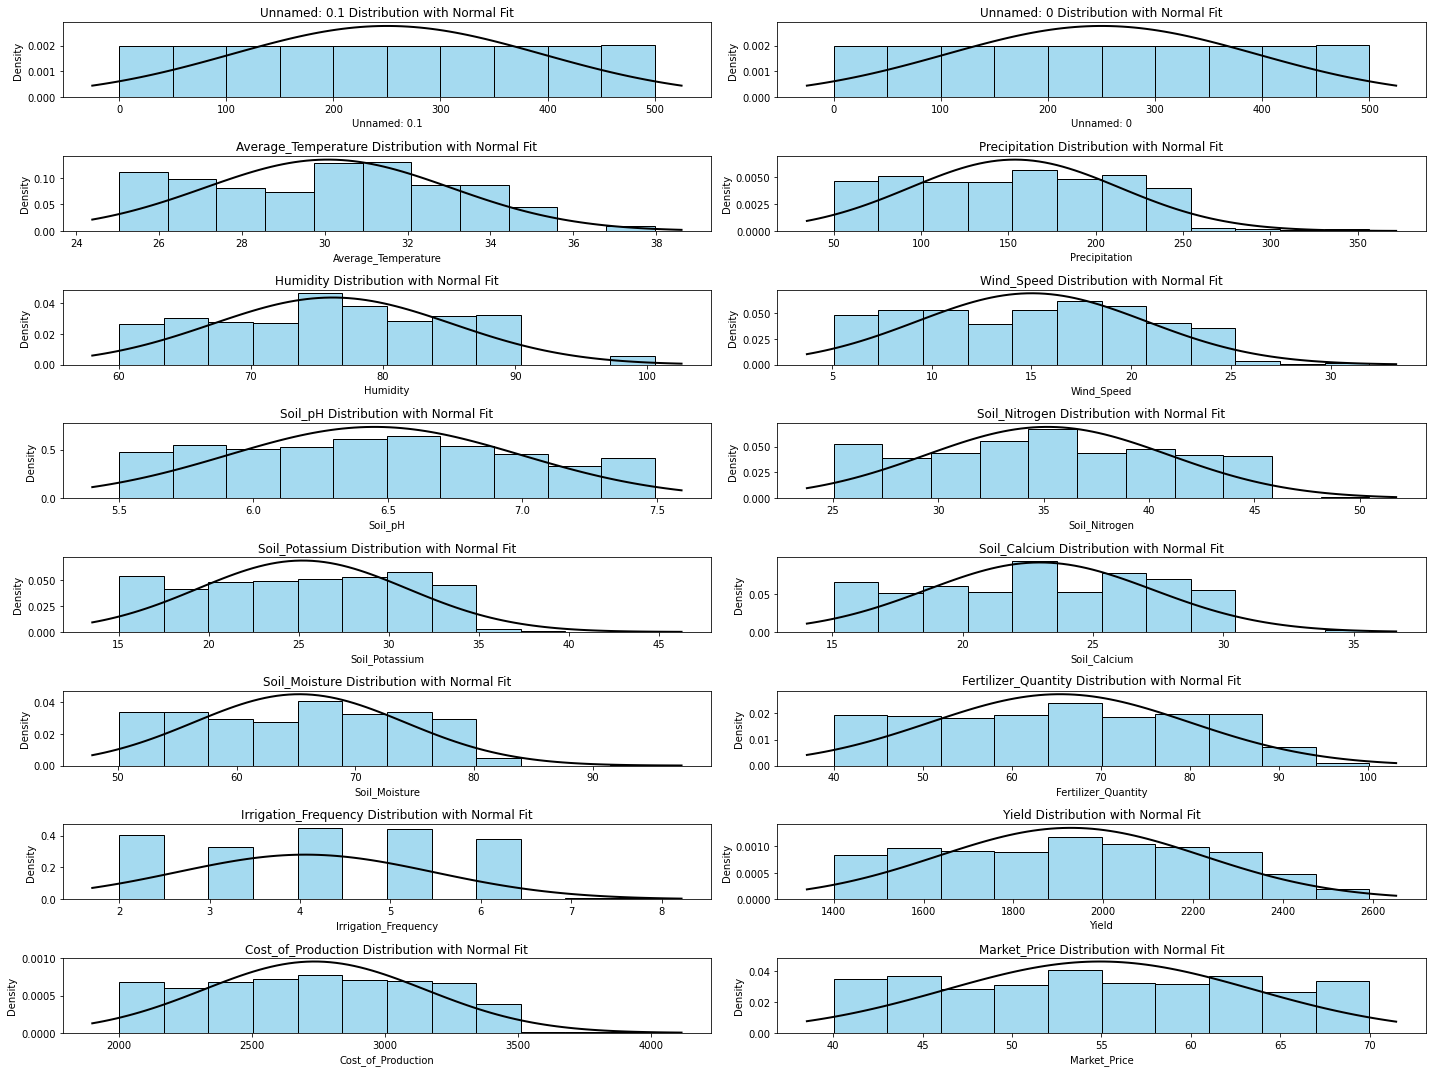

In [79]:
import math
from scipy.stats import norm
columns=[]
for col in df.columns.to_list():
    if pd.api.types.is_numeric_dtype(df[col]):
        columns.append(col)
num_fields = len(columns)
num_rows = math.ceil(num_fields / 2)
num_cols = 2  # Two plots per row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(df[col], color='skyblue', stat='density', ax=axes[i])
    mu, std = norm.fit(df[col])

    xmin, xmax = axes[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i].plot(x, p, 'k', linewidth=2)
    
    axes[i].set_title(f'{col} Distribution with Normal Fit')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

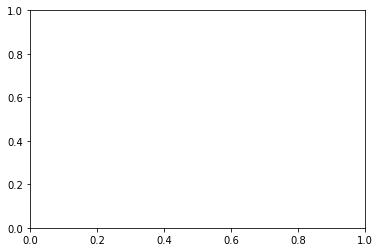

In [111]:
sns.kdeplot(df['Yield'])

<h2>Correlation </h2>

In [67]:
corr_results=df[['Yield', 'Average_Temperature', 'Precipitation', 'Humidity', 'Wind_Speed',
                          'Soil_pH', 'Soil_Nitrogen', 'Soil_Potassium', 'Soil_Calcium', 'Soil_Moisture',
                          'Fertilizer_Quantity', 'Irrigation_Frequency', 'Cost_of_Production', 'Market_Price']].corr()
corr_results['Yield']


Yield                   1.000000
Average_Temperature    -0.011330
Precipitation          -0.726056
Humidity               -0.029682
Wind_Speed              0.087977
Soil_pH                 0.041811
Soil_Nitrogen           0.085213
Soil_Potassium          0.013925
Soil_Calcium            0.012265
Soil_Moisture          -0.009939
Fertilizer_Quantity     0.771916
Irrigation_Frequency    0.014422
Cost_of_Production      0.799035
Market_Price           -0.007859
Name: Yield, dtype: float64

<h2>HeatMap </h2>

<p>To show the relationship between variables plotted on each axis.</p>
<p>To observe if there are any patterns in value of one or more variables.</p>

Text(0.5, 1.0, 'Heatmap')

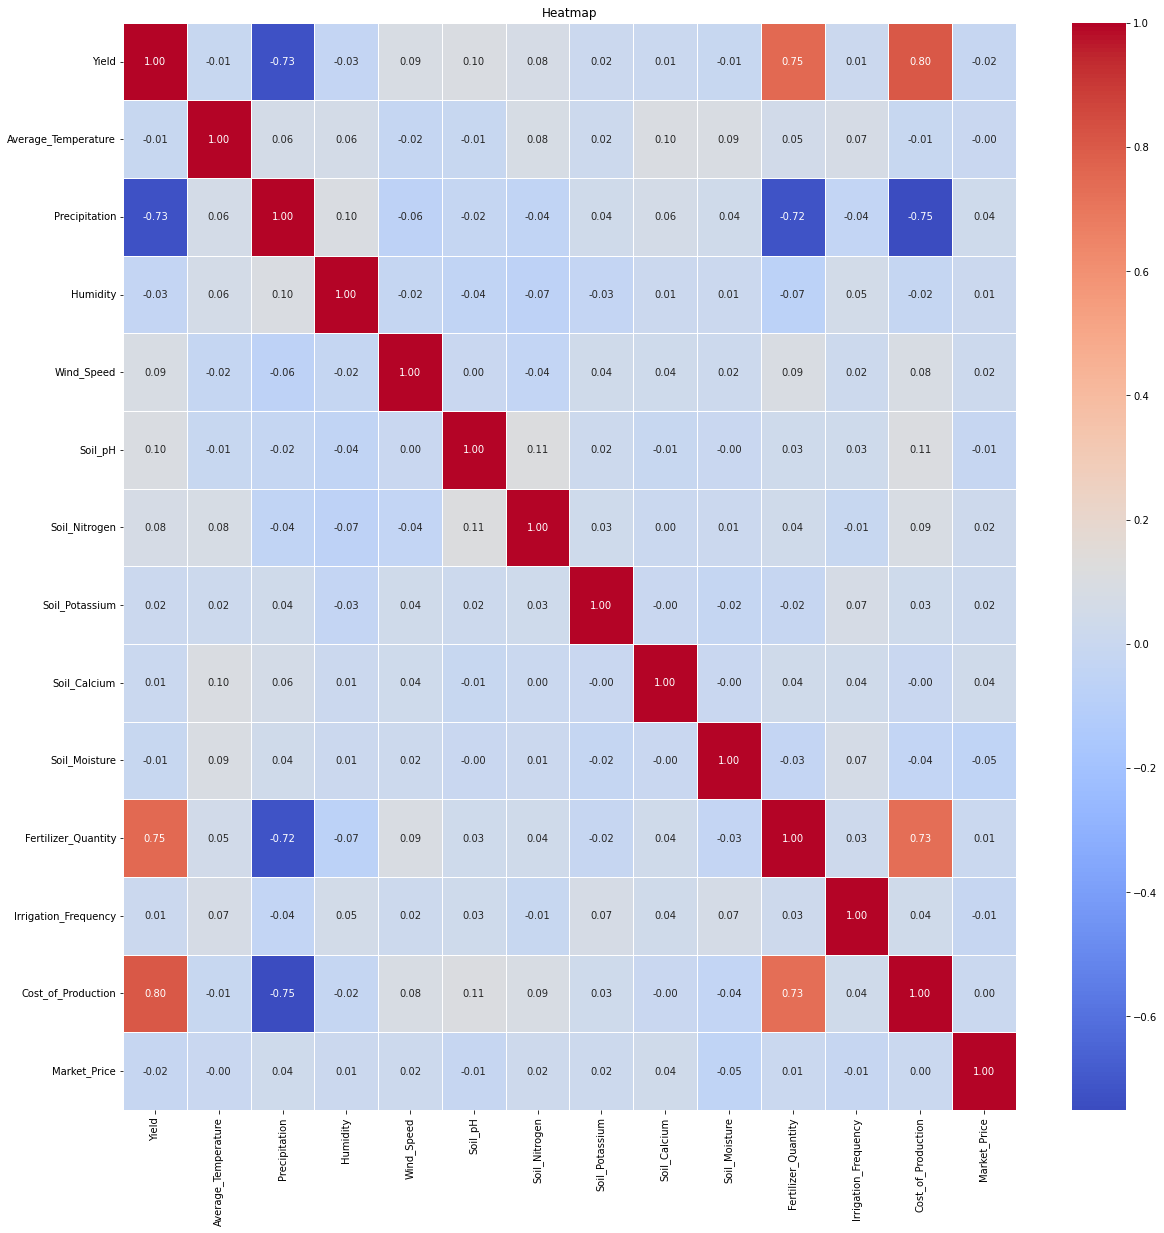

In [22]:
# new_corr_results=df[['Yield','Average_Temperature', 'Precipitation', 'Humidity','Soil_pH','Market_Price']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_results,fmt='.2f',linewidths=.5, annot=True, cmap='coolwarm')
plt.title("Heatmap")

<h3>Interpretation</h3>
<ul>
<li>r=1 indicates a perfect positive linear relationship.</li>
<li>r=−1 indicates a perfect negative linear relationship.</li>
<li>r=0 indicates no linear relationship</li>

</ul>
<h4>Also</h4>
<ul>
<li>Positive values indicate a positive correlation (as one variable increases, the other tends to increase)</li>
<li>Negative values indicate a negative correlation (as one variable increases, the other tends to decrease)</li>
<li>The magnitude of the correlation coefficient indicates the strength of the linear relationship.</li>
</ul>

<h3>Scatterplots(Yield and other parameters)</h3>

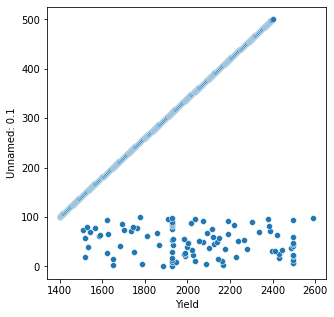

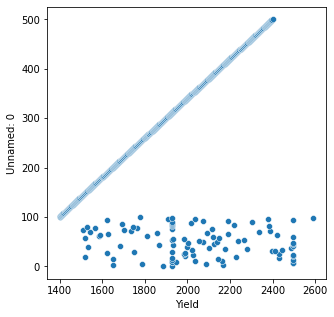

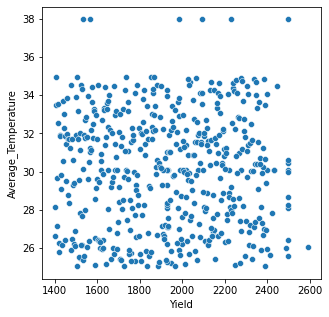

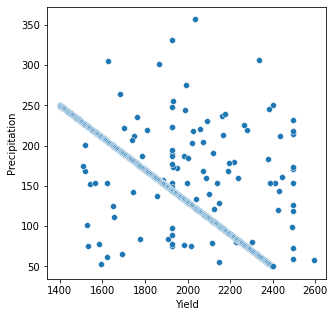

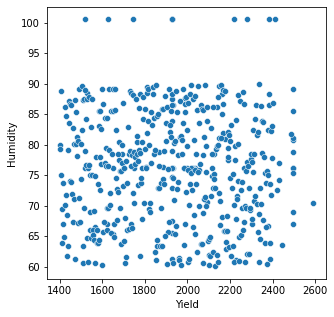

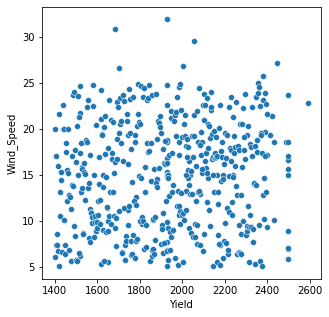

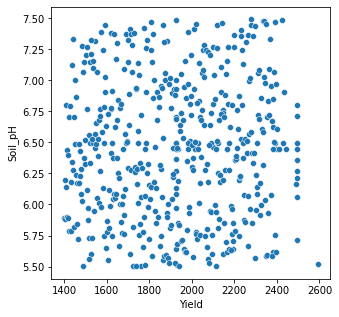

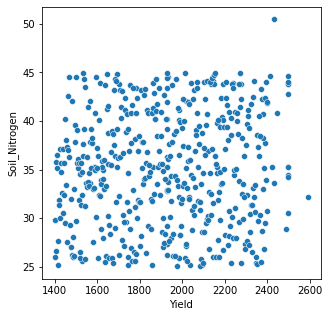

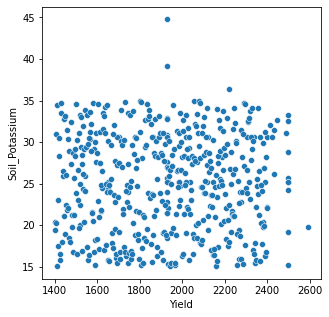

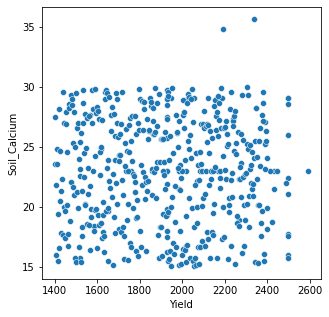

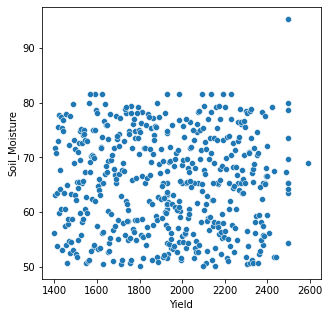

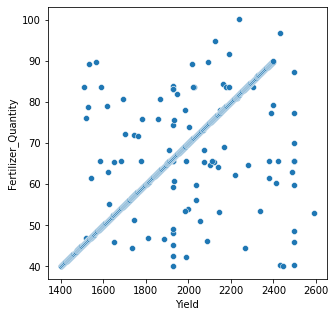

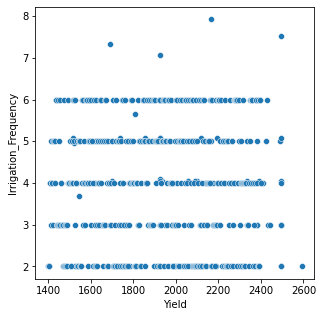

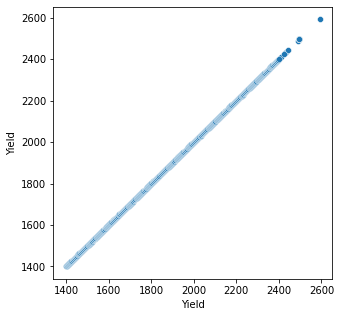

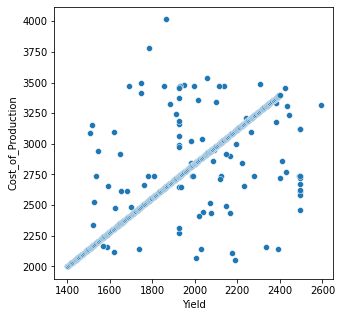

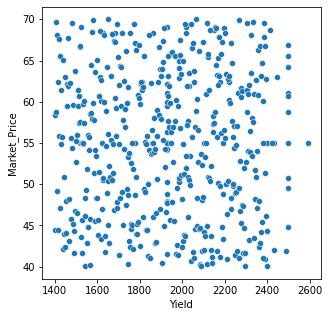

In [100]:

# x = df["Yield"]
# col = columns
# colors = ['blue', 'red', 'orange', 'pink']

for i in columns:
    # plt.xlabel("Yield")
    # plt.ylabel(i)
    plt.figure(figsize=(5,5))
    sns.scatterplot(x= df["Yield"],y= df[i])


<h2>Regression</h2>

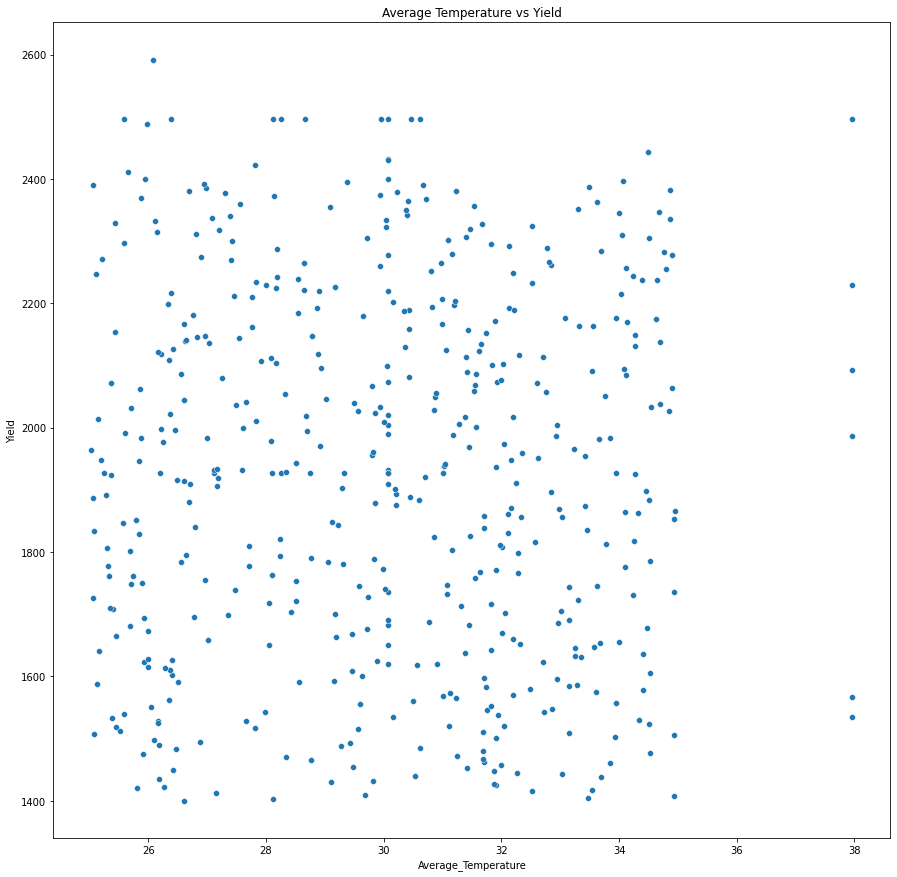

In [101]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=df['Average_Temperature'],y=df['Yield'])
plt.xlabel("Average_Temperature")
plt.ylabel("Yield")
plt.title("Average Temperature vs Yield")
plt.show()

<h2>Yield vs Avg Temperature</h2>

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

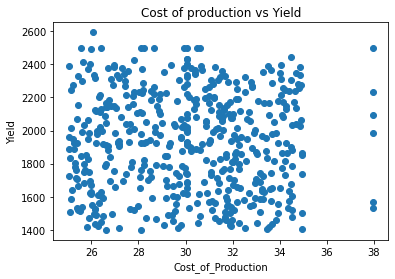

In [102]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope*x+intercept

mymodel=list(map(myfunc,x))
plt.scatter(x,y,label="Data point")
plt.xlabel("Cost_of_Production")
plt.ylabel("Yield")
plt.title("Cost of production vs Yield")
plt.plot(x,mymodel,color='red',label="Regression line")
plt.legend()
plt.show()

print("Prediction using slope line")

y=myfunc(85)
print(y)

<h2>Subplots for Yield and all independent variables</h2>

ValueError: Expected 2D array, got 1D array instead:
array=[ 74.81781149  61.01837936  78.24519462  83.6169976   76.17720415
  83.49608138  82.91878876  78.46278216  85.40753971  89.20101279
  72.85793171  86.72777583  74.2264265   70.75368543  61.15434905
  77.2606476   78.23279063  63.42266864  69.56257509  73.23165259
  85.55203558  85.33144922  87.41378836  66.15104123  73.6920311
  81.60909874  64.91585307  67.28236151  81.4768648   77.88809635
  71.70241195  70.32201977  69.01482566  80.03134782  72.05792741
  76.50788409  76.17720415  77.03835692  88.40513797 100.56221103
  72.70265694  83.92697893  66.92009435  73.7474508   83.88974913
  89.13174735  64.19507318  79.25174506  79.77106957  79.763501
  79.16416711  78.47589565  65.41726035  82.47418568  73.60729448
  81.96674659  76.93535622  85.07588095  86.21031343  86.26033637
  80.56939132  77.48036262 100.56221103  64.9199971   88.57953945
  76.17720415  85.47586955  76.45036299  67.01522932  81.74300315
  66.02033097  84.20686554  83.5704401   68.51766689  64.42150765
  89.82678159  60.21190271  63.35764519  85.69047971  64.56474111
  72.0378327   68.21077022  89.42074571  67.37764128  74.36443242
  60.82297683  63.31422339  72.23043738  60.64630858  88.24636614
  69.93707869  65.8091332   85.42191006  64.9031545   73.30145677
  87.26907863  78.23210385  64.70351388  63.72667402  71.5125514
 100.56221103  78.46943709  64.42051459  65.9174419   78.44575603
  65.96480835  76.17720415  70.30210559  62.4017069   86.07078678
  87.22458116  81.23785659  64.94695113  67.79104387  87.93772662
  81.14113941  77.26096957  68.49423736  88.45055537  64.85303837
  83.22649555 100.56221103  70.08771018  67.38669088  63.65277179
  87.42673193  65.11249908  72.82267507  78.8251639   70.17356038
  66.95015104  60.89158319  80.76829694  75.50776155  88.2934931
  72.26310713  75.00781436  84.24749428  77.98732312  79.22571721
  67.32384887  69.59263484  66.63628325  60.22307026  75.04504034
 100.56221103  61.96069022  74.45162671  74.86319725  81.57438187
  78.97582793  89.99793382  85.49597254  73.62274708  78.01466714
  87.48324182  72.92542127  69.56417639  60.73624126  76.45674173
  73.81832041  68.86994129  66.61458627  82.34209031  88.13808664
  82.14907141  65.59314786  88.99950899  86.51951478  86.72713446
  67.02013926  81.39880762  67.27712885  88.03830134  87.5085037
  61.71869524  61.88209346  64.33272755  82.66078992  86.10188813
  60.58872827  75.19126058  86.85100299  61.27321463  74.52301212
  63.36575102  62.01808457  83.86874597  73.71781365  75.90818698
  85.84605167  85.87344879  79.76355157  84.66920855  82.50169353
  82.11910627  71.61623228  66.46869583  67.66616036  89.61296146
  78.99909532  78.90449251  65.2068007   67.07598758  65.57562047
  87.78398985  88.78417342  61.68469799  86.64637548  72.63363888
  67.94331102  89.76525889  79.95378342  71.04797448  85.07937022
  64.00869202  73.71798697  81.19442888  61.11098724  81.28958681
  76.87044532  86.57933245  67.73504843  82.12746905  84.63871252
  76.17720415  76.85409377  84.30761965  82.80312811  64.61304613
  88.32178019  80.88866328  69.5730142   66.01774372  89.58270904
  89.64229863  86.84152653  76.25272224  65.29584096  75.86811402
  78.86319413  71.45641033  74.3586527   76.83060864  76.17720415
  80.0320149   72.90229123  82.45274222  89.72429326  74.60170556
  64.56485304  76.17720415  80.36129927  69.97548814  61.7352803
  61.61250161  70.08280394  80.49695588  83.30208971  63.87720713
  76.17720415  85.78028031  63.66013658  89.52250408  60.73202345
 100.56221103  89.0625605   81.18567151  89.08975686  86.6497635
  85.33648196  75.11657135  78.5343463   85.84216799  72.83691415
  87.44594058  63.3333963   71.26804033  83.04820242  80.60678121
  80.07962044  72.86799606  67.49004027  87.19455172  75.46059903
  72.64071007  80.58845956  81.16725518  76.60339079  76.18473877
  64.2100863   78.5407419   81.11713698  75.61116778  62.3607105
  83.13630701  84.11592914  87.82563755  66.37187849  74.55760416
  77.52145083  74.3974443   73.65385201  78.61884472  60.46217257
  86.58750575  60.34231118  66.50207248  79.88444376  85.52343546
  75.05971499  78.77674129  79.91266218  66.78175857  84.39066774
  85.48044348  70.36906012  63.82296566  83.96349707  62.42779757
  76.25702842  73.9439776   83.76438947  60.63808233  63.17901693
 100.56221103  89.1738164   76.17720415  76.13771349  60.69986186
  86.47139216  79.48939947  82.4267369   60.67016822  88.17203096
  73.49578233  81.90867279  70.47609867  61.18280434  70.98565333
  76.17720415  78.46301503  76.94161635  69.04377227  60.24532439
  86.51759695  78.10172125  89.20775948  78.55504843  88.84236376
  77.90596046  76.17720415  83.48807682  86.24105018  69.24929277
  85.5086952   65.96349291  66.05377896  71.67540172  79.43052418
  78.00574794 100.56221103  76.17720415  70.16359416  76.50636175
  88.32814963  68.92047022  60.63508409  77.62675405  82.97118214
  88.32837297  69.68449976  69.55667312  71.61741472  63.37254328
  62.87427092  61.31927188  84.13764562  83.20575107  89.03220878
  87.40238943  76.69180512  85.70774341  70.50375778  71.16470256
  76.17720415  69.53739158  80.78923523  75.63230247  78.48365481
  74.04064822  86.8097393   76.17720415  76.49682357  67.00823253
  69.48858531  70.42829444  75.31463365  74.1043765   79.30266672].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

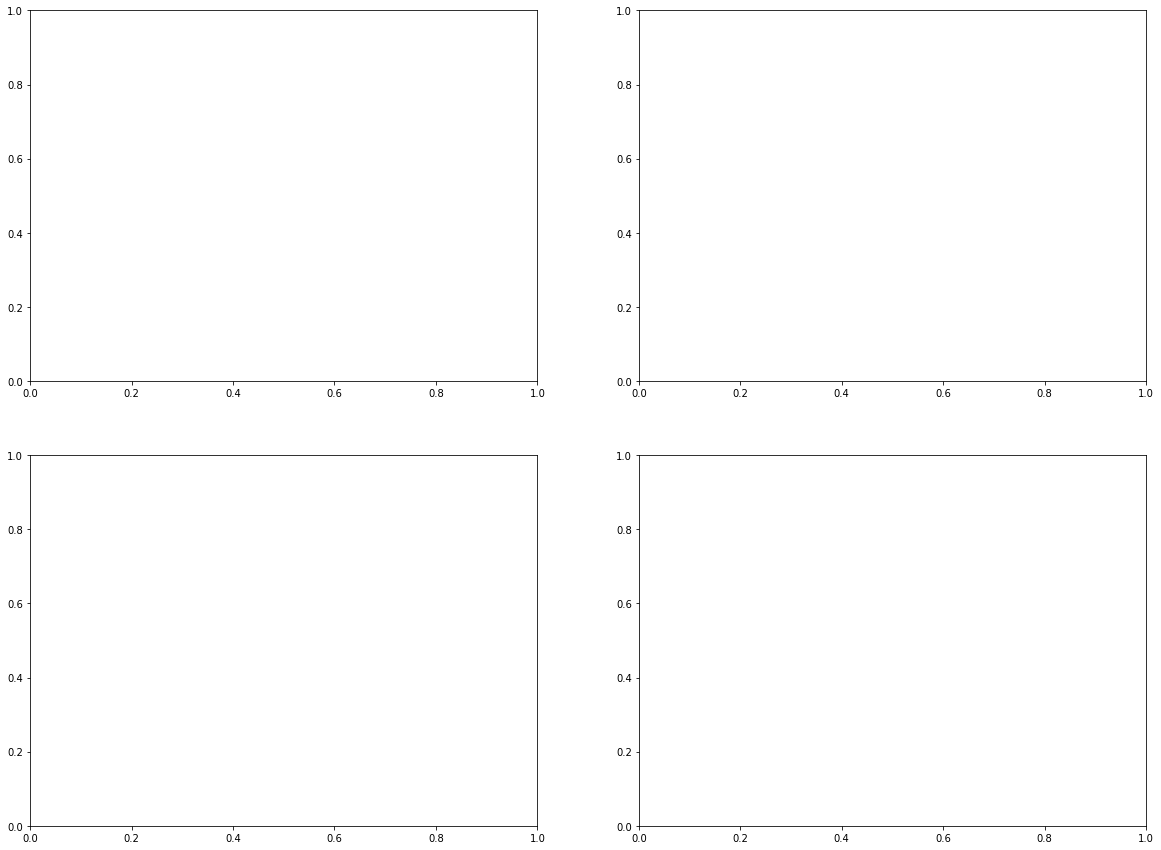

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = df[['Humidity',
               'Soil_pH',   'Soil_Moisture','Average_Temperature']]
target=df['Yield']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


flag,axes=plt.subplots(nrows=2,ncols=2,figsize=(20,15))

axes=axes.flatten()

for i,col in enumerate(features):

    model=LinearRegression()
    model.fit(X_train[col], y_train)
    predictions = model.predict(X_test[col])

    axes[i].scatter(X_test[col],y_test,label='Actual')
    axes[i].plot(X_test[col], predictions, color='red', linewidth=2, label='Regression Line')
    axes[i].set_title(f'{col} vs. Yield')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Yield')
    axes[i].legend()

plt.tight_layout()
plt.show()

<h3>Coefficient and Significance</h3>

In [23]:
print("coefficient:",model.coef_)

print("intercept:",model.intercept_)

coefficient: [-1.92821192]
intercept: 1973.5850943520072


<h2>Interpretation of coefficient</h2>

<ul>
<li>The coefficient represents the estimated change in the dependent variable for a one-unit change in the corresponding independent variable</li>
<li>The negative value indicates that an increase in the variable is associated with decrease in dependent variable</li>
</ul>

<h2>Z-test</h2>

<h3>Z-test for one sample</h3>

In [91]:
from statsmodels.stats.weightstats import ztest

print("H0:There is no significant difference between sample mean and given mean.")
print("H1:There is significant difference between to variable. ")

group1=df['Humidity']
print("-----------------")
print("Describe of Humidity:")
print(group1.describe())
print('-----------------')
z_stat1,p_value1=ztest(group1,value=100)

z_alpha=0.05
if p_value1<z_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the sample mean and given mean.")

H0:There is no significant difference between sample mean and given mean.
H1:There is significant difference between to variable. 
-----------------
Describe of Humidity:
count    501.000000
mean      76.177204
std        9.099735
min       60.019171
25%       68.920470
50%       76.177204
75%       83.205751
max      100.562211
Name: Humidity, dtype: float64
-----------------
Reject the null hypothesis: There is a significant difference between the means.


<h3>Between Two Samples</h3>

In [92]:

z_stat,p_value=ztest(df['Average_Temperature'],df['Soil_Moisture'])
 
z_alpha=0.05

if p_value<z_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

Reject the null hypothesis: There is a significant difference between the means.


<h3>Limitations of Z-test</h3>
<ul>
<li>It can applied only for large sets</li>
<li>For no of samples less than 30 we can use Student T-Test</li>
<li>The Standard Deviation of Population is not usually known</li>
</ul>

<h2>T-Test</h2>

<h3>T-test for One Sample</h3>
<h5>For Precipitation</h5>

In [26]:
from scipy import stats
t_stat,pt_value=stats.ttest_1samp(df['Precipitation'],10)
t_alpha=0.05
if pt_value<t_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.") 

Reject the null hypothesis: There is a significant difference between the means.


<h3>Between Two Samples</h3>

In [27]:
t_stat,pt1_value=stats.ttest_ind(df['Average_Temperature'],df['Yield'])
t_alpha=0.05
if pt_value<t_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.") 

Reject the null hypothesis: There is a significant difference between the means.


<h3>Limitations of T-Test</h3>
<ul>
<li>Can be applied only to sample whose size is less than 30 (n<30)</li>
<li>Also if the sample size is small (less than 15), the one-sample t-test should not be used if the data are clearly skewed or the outliers are present</li>
</ul>

<h2>ANOVA</h2>

<h5>ANOVA is a technique that will enable us to test for the significance of the difference
among more than two sample means</h5>

<h3>One Way Analysis</h3>

In [89]:
from scipy import stats

# x = pd.to_numeric(df['Variety'], errors='coerce')

f_alpha = 0.05

f_stat, p_value = stats.f_oneway(df['Soil_pH'], df['Yield'])

if p_value < f_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")

Reject the null hypothesis: There is a significant difference between the means.


In [97]:
x = pd.to_numeric(df['Variety'], errors='coerce')
y = df['Yield']
f_alpha = 0.05

f_stat, p_value = stats.f_oneway(x, y)

if p_value < f_alpha:
    print("Reject the null hypothesis: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the means.")
df.info()


Fail to reject the null hypothesis: There is no significant difference between the means.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          501 non-null    int64  
 1   Unnamed: 0            501 non-null    int64  
 2   Average_Temperature   501 non-null    float64
 3   Precipitation         501 non-null    float64
 4   Humidity              501 non-null    float64
 5   Wind_Speed            501 non-null    float64
 6   Soil_Type             501 non-null    object 
 7   Soil_pH               501 non-null    float64
 8   Soil_Nitrogen         501 non-null    float64
 9   Soil_Potassium        501 non-null    float64
 10  Soil_Calcium          501 non-null    float64
 11  Soil_Moisture         501 non-null    float64
 12  Variety               501 non-null    object 
 13  Fertilizer_Type       501 non-null 

<h3>Two Way Analysis</h3>

In [30]:
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm

formula='Yield ~ Variety + Irrigation_Type + Humidity'
model=ols(formula,data=df).fit()
annova_table=anova_lm(model)

print("Two Way Results:")
print(annova_table)

p_value_variety = annova_table['PR(>F)']['Variety']
p_value_irrigation = annova_table['PR(>F)']['Irrigation_Type']
p_value_humidity = annova_table['PR(>F)']['Humidity']

alpha = 0.05
print("\n")
if p_value_variety < alpha:
    print("Reject the null hypothesis for Variety: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis for Variety: There is no significant difference between the means.")

if p_value_irrigation < alpha:
    print("Reject the null hypothesis for Irrigation_Type: There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis for Irrigation_Type: There is no significant difference between the means.")

if p_value_humidity < alpha:
    print("Reject the null hypothesis for Interaction: There is a significant interaction effect.")
else:
    print("Fail to reject the null hypothesis for humidity: There is no significant interaction effect.")


Two Way Results:
                    df        sum_sq        mean_sq         F    PR(>F)
Variety            4.0  3.213950e+05   80348.757380  0.935375  0.443067
Irrigation_Type    2.0  9.165277e+05  458263.863488  5.334849  0.005103
Humidity           1.0  2.847061e+04   28470.607583  0.331439  0.565076
Residual         493.0  4.234873e+07   85900.065001       NaN       NaN


Fail to reject the null hypothesis for Variety: There is no significant difference between the means.
Reject the null hypothesis for Irrigation_Type: There is a significant difference between the means.
Fail to reject the null hypothesis for humidity: There is no significant interaction effect.


<h2>Building The Model</h2>

In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_data.csv' with your actual file)


In [81]:

# Define features (X) and target variable (y)
features=['Average_Temperature','Precipitation','Humidity','Wind_Speed','Soil_pH','Soil_Nitrogen','Soil_Potassium','Soil_Calcium','Soil_Moisture','Fertilizer_Quantity','Irrigation_Frequency','Cost_of_Production','Market_Price']
# features=['Fertilizer_Quantity','Cost_of_Production',]
X = df[features]
df

,Unnamed: 0.1,Unnamed: 0,Average_Temperature,Precipitation,Humidity,Wind_Speed,Soil_Type,Soil_pH,Soil_Nitrogen,Soil_Potassium,...,Variety,Fertilizer_Type,Fertilizer_Quantity,Irrigation_Type,Irrigation_Frequency,Location,Yield,Quantity,Cost_of_Production,Market_Price
0,0,0,30.073755,189.632343,65.553988,15.381636,Clay,6.498371,32.763314,25.650081,...,brown,Organic,59.438421,Flood,5.0,South India,1927.474510,Grade A,2992.171725,54.114200
1,1,1,34.507143,157.219273,76.257028,14.583638,Loam,7.319254,38.482606,17.307893,...,Basmati,Organic,46.570619,Flood,3.0,North India,1883.481123,Grade A,3322.854927,55.834221
2,2,2,32.319939,111.905523,76.177204,5.512841,Loam,6.838401,30.198100,25.250519,...,brown,Organic,65.413906,Flood,3.0,South India,1652.228214,Grade B,2614.083697,69.991229
3,3,3,30.986585,212.759004,81.966747,11.824957,Loam,7.158574,31.903844,17.344078,...,Sona Masoori,Chemical,69.060774,Flood,5.0,South India,2166.708855,Grade C,2434.821019,65.299089
4,4,4,26.560186,186.946235,76.177204,12.603912,Silt,7.257958,43.349717,21.744132,...,brown,Chemical,75.908397,Flood,2.0,South India,1784.288289,Grade C,3779.261594,50.853100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,496,30.663501,52.005013,63.885045,23.940430,Loam,7.471177,42.393851,16.236144,...,Jasmine,Chemical,89.498747,Flood,2.0,North India,2389.974937,Grade C,3385.964912,66.748583
497,497,497,26.954068,51.503759,71.675402,22.757946,Silt,5.753810,33.955415,16.749878,...,Jasmine,Chemical,89.624060,Sprinkler,2.0,West India,2392.481203,Grade A,3389.473684,62.762796
498,498,498,29.379897,51.002506,82.180435,13.163122,Clay,6.967334,43.976799,28.187294,...,Sona Masoori,Organic,89.749373,Sprinkler,6.0,North India,2394.987469,Grade A,3392.982456,46.142261
499,499,499,34.062922,50.501253,83.136307,21.707231,Silt,5.619329,30.749520,22.129660,...,ponni,Organic,89.874687,Drip,6.0,West India,2397.493734,Grade C,3396.491228,40.025305


In [80]:
  # Adjust column names
y = df['Yield']
old_new={'Basmati':1,'Sona Masoori':2,'Jasmine':3,'ponni':4,'brown':5}  # Adjust column name
y

0      1927.474510
1      1883.481123
2      1652.228214
3      2166.708855
4      1784.288289
          ...     
496    2389.974937
497    2392.481203
498    2394.987469
499    2397.493734
500    2400.000000
Name: Yield, Length: 501, dtype: float64

In [9]:
import math
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the testing data
predictions = model.predict(X_test)

# Model evaluation
mse =math.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# Print results
print(f'Mean Squared Error: {mse}, R-squared: {r2}')

# Validate the model using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_scores}')


Mean Squared Error: 214.6771903113746, R-squared: 0.4651084228608571
Cross-Validation R-squared Scores: [-1.00125699 -2.29394075  0.61277939  0.90722794  0.2191243 ]


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Classification Report
# print('Classification Report:')
# print(classification_report(y_test, y_pred))

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Text(0, 0.5, 'Predicted values')

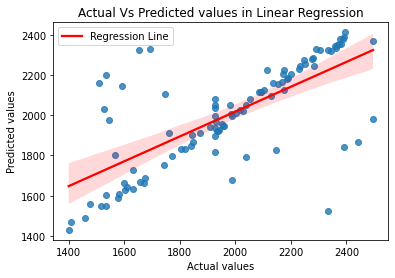

In [110]:
sns.regplot(x=y_test,y=predictions,line_kws={'color': 'red','label':'Regression Line'})
plt.legend()
plt.title('Actual Vs Predicted values in Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'Predicted values')

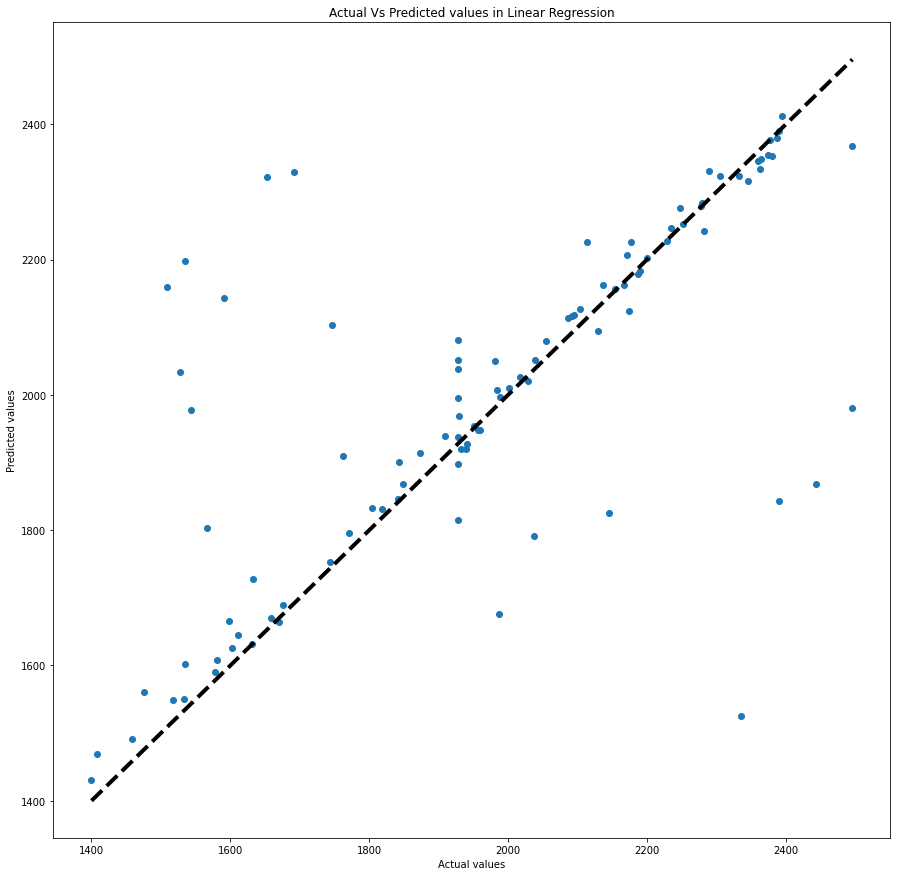

In [70]:
plt.figure(figsize=(15,15))
plt.scatter(y_test,predictions)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4)
plt.title('Actual Vs Predicted values in Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
# plt.show()